# **Import Packages**

# **Explore the datasets names in Seaborn**

# **Load Titanic data and explore it**

In [ ]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# **Pandas Profiling**

In [ ]:
# eda_report = pandas_profiling.ProfileReport(titanic)
# eda_report

# **Drop unnecessary columns**

In [ ]:
titanic.drop(columns = ['who', 'adult_male', 'embark_town', 'alone', 'alive', 'class','deck'], inplace = True)

# **Rename columns**

# **Check for missing values**

In [ ]:
titanic[titanic['embarked'].isna()]

,survived,pclass,gender,age,siblings,parents_child,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [ ]:
titanic[titanic['survived'].isna()]

In [ ]:
titanic.info()

In [ ]:
titanic_treated = titanic.fillna({'age':35 , 'embarked' : 'S'})

In [ ]:
titanic_treated.isna().sum()

In [ ]:
titanic[titanic['embarked'].isna()]

In [ ]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

In [ ]:
titanic[titanic['embarked'].isna()]

,survived,pclass,gender,age,siblings,parents_child,fare,embarked


replace with median for numerical var

In [ ]:
titanic['age'].mean()

29.69911764705882

In [ ]:
titanic.iloc[[347,633],:]

,survived,pclass,gender,age,siblings,parents_child,fare,embarked
347,1,3,female,28.0,1,0,16.1,S
633,0,1,male,28.0,0,0,0.0,S


In [ ]:
titanic.info()

<Axes: >

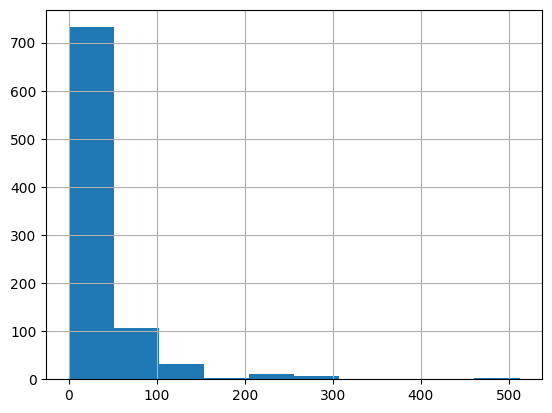

In [ ]:
titanic['fare'].hist()

In [ ]:
titanic.quantile([0.01,0.99])

<ipython-input-36-522fbcda54b7>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.quantile([0.01,0.99])


,survived,pclass,age,siblings,parents_child,fare
0.01,0.0,1.0,1.0,0.0,0.0,0.00000
0.99,1.0,3.0,65.0,5.0,4.0,249.00622


In [ ]:
titanic.fare.hist()

In [ ]:
titanic.fare= np.clip(titanic.fare, titanic.fare.quantile(0.05), titanic.fare.quantile(0.99))

In [ ]:
titanic.fare.describe()

count    891.000000
mean      31.348347
std       42.366571
min        7.225000
25%        7.910400
50%       14.454200
75%       31.000000
max      247.669342
Name: fare, dtype: float64

In [ ]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

In [ ]:
iris_df.describe()

In [ ]:
iris_df.drop(['Species'], axis=1, inplace = True)

In [ ]:
iris_df.describe()

In [ ]:
iris_df['species'][iris_df['species'] == 'setosa'].count()
iris_df['species'][iris_df['species'] == 'versicolor'].count()
iris_df['species'][iris_df['species'] == 'virginica'].count()

In [ ]:
titanic.iloc[[61,829],:]

In [ ]:
titanic['Embarked'].isnull().sum()

In [ ]:
titanic = titanic.fillna(titanic.median())

In [ ]:
titanic.iloc[[5,17,19],:]

In [ ]:
for x in titanic.columns:
    if titanic[x].dtype == "object":
        titanic[x]=pd.Categorical(titanic[x]).codes

titanic.head()

In [ ]:
x = titanic.drop(['survived'], axis = 1)
x.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify = y)

In [ ]:
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(max_depth = 2)

In [ ]:
predicted = my_tree_one.predict(x_test)

In [ ]:
x_test.columns

In [ ]:
# Visualize the decision tree graph
# conda install -c anaconda graphviz
# conda install -c conda-forge python-graphviz
import graphviz
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one, out_file=dotfile, feature_names=x.columns, filled=True)
    dotfile.close()

# You may have to install graphviz package using
# conda install graphviz
# conda install python-graphviz

from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot

In [ ]:
plot.filename('dt1.png')

In [ ]:
by_gender_class['age']

In [ ]:
titanic.iloc[118,:]
titanic.iloc[121,:]

In [ ]:
import numpy as np

def detect_outliers(df,n,features):
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices = collections.Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(titanic,2,["age","sibsp","parch","fare"])


In [ ]:
titanic = titanic.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
titanic.info()
titanic_data=titanic

In [ ]:
titanic.groupby('sex').size()

In [ ]:
embark_dummies.sample(100)

In [ ]:
titanic.describe()['age']

In [ ]:
a=round(titanic.groupby('survived').mean(),2)
a

In [ ]:
def persontype_func(age_Sex):
    age, sex = age_Sex
    if age < 16:
        return 'Child'
    elif sex == 1:
        return 'Woman'
    else:
        return 'Man'
titanic['PersonType'] = titanic[['age', 'sex']].apply(persontype_func, axis=1)

In [ ]:
def persontype_func_num(age_Sex):
    age, sex = age_Sex
    if age < 16:
        m=2
    else:
        if sex == 1:
            m=1
        else:
            m=0
    return m
titanic['PersonType_num'] = titanic[['age', 'sex']].apply(persontype_func_num, axis=1)

In [ ]:
sns.distplot(titanic['age'], bins=15, kde=True)
plt.ylabel('Count')
plt.title('Agewise distribution of the passengers aboard the Titanic')
plt.show();

In [ ]:
#titanic_input.drop(['Pclass','Embarked'],axis=1,inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(titanic[['survived','sex','age','sibsp','parch','PersonType_num', 'pclass', 'fare']].corr()
            ,cmap="RdYlGn",annot=True)
plt.show();

In [ ]:
sns.lmplot('age', 'fare', data=titanic, fit_reg=True,
           hue="PersonType")
plt.title('Scatterplot of passengers grouped by Fare and Age')
plt.show();